In [8]:
import nengo
import numpy as np
import matplotlib.pyplot as plt


Build finished in 0:00:01.                                                      
Simulation finished in 0:00:01.                                                 


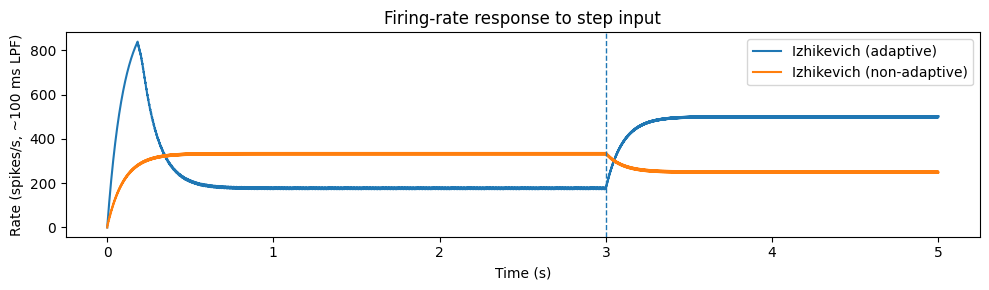

In [27]:
import nengo
import numpy as np
import matplotlib.pyplot as plt

duration = 5.0

model = nengo.Network(seed=1)
with model:
    u = nengo.Node(lambda t: 1.2 if t < 3.0 else 0.8)

    izh_adapt = nengo.Ensemble(
        n_neurons=1, dimensions=1,
        neuron_type=nengo.Izhikevich(
            tau_recovery=0.001,   
            coupling=0.4,     
            reset_voltage=-65.0, 
            reset_recovery=10.0   
        )
    )

    izh_noadapt = nengo.Ensemble(
        n_neurons=1, dimensions=1,
        neuron_type=nengo.Izhikevich(
            tau_recovery=0.1,   
            coupling=0.0,       
            reset_voltage=-65.0,
            reset_recovery=0.0   
        )
    )

    nengo.Connection(u, izh_adapt.neurons, synapse=None)
    nengo.Connection(u, izh_noadapt.neurons, synapse=None)

    p_u = nengo.Probe(u)
    p_adapt_spk = nengo.Probe(izh_adapt.neurons)
    p_noadapt_spk = nengo.Probe(izh_noadapt.neurons)
    p_adapt_rate = nengo.Probe(izh_adapt.neurons, synapse=0.1)
    p_noadapt_rate = nengo.Probe(izh_noadapt.neurons, synapse=0.1)

with nengo.Simulator(model, dt=0.001) as sim:
    sim.run(duration)

t = sim.trange()
adapt_rate = sim.data[p_adapt_rate].ravel()
noadapt_rate = sim.data[p_noadapt_rate].ravel()

plt.figure(figsize=(10, 3))
plt.plot(t, adapt_rate, label="Izhikevich (adaptive)")
plt.plot(t, noadapt_rate, label="Izhikevich (non-adaptive)")
plt.axvline(3.0, linestyle='--', linewidth=1)
plt.xlabel("Time (s)")
plt.ylabel("Rate (spikes/s, ~100 ms LPF)")
plt.title("Firing-rate response to step input")
plt.legend()
plt.tight_layout()
plt.show()